### Jupyter notebook for Preliminary data analysis and Naive Bayes classifer

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("data"))


['employee_reviews.csv']


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
review_dataset = pd.read_csv('data/employee_reviews.csv')

In [7]:
review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

In [71]:
review_dataset.isna().sum()

Unnamed: 0                      0
company                         0
location                        0
dates                           0
job-title                       0
summary                       120
pros                            0
cons                            0
advice-to-mgmt                297
overall-ratings                 0
work-balance-stars              0
culture-values-stars            0
carrer-opportunities-stars      0
comp-benefit-stars              0
senior-mangemnet-stars          0
helpful-count                   0
link                            0
Liked                           0
dtype: int64

In [29]:
review_dataset.describe()

,Unnamed: 0,overall-ratings,helpful-count,Liked
count,67529.000000,67529.000000,67529.000000,67529.000000
mean,33765.000000,3.826075,1.268211,0.863940
std,19494.087501,1.154989,16.085852,0.342855
min,1.000000,1.000000,0.000000,0.000000
25%,16883.000000,3.000000,0.000000,1.000000
50%,33765.000000,4.000000,0.000000,1.000000
75%,50647.000000,5.000000,1.000000,1.000000
max,67529.000000,5.000000,2094.000000,1.000000


In [32]:
#Find null values
for var in review_dataset.columns.values:
    if review_dataset[var].isnull().sum() > 0:
        print('{}  {}'.format(var , review_dataset[var].isnull().sum()))

summary  120
advice-to-mgmt  297


In [33]:
convert_dtype_list = ['work-balance-stars' , 'culture-values-stars' , 'carrer-opportunities-stars',
                     'comp-benefit-stars','senior-mangemnet-stars', 'helpful-count']

for var in convert_dtype_list: 
    review_dataset[var] = review_dataset[var].replace('none' , 0)
    review_dataset[var] =  review_dataset[var].astype(np.float32)

In [58]:
review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 18 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null float32
culture-values-stars          67529 non-null float32
carrer-opportunities-stars    67529 non-null float32
comp-benefit-stars            67529 non-null float32
senior-mangemnet-stars        67529 non-null float32
helpful-count                 67529 non-null float32
link                          67529 non-null object
L

In [34]:
review_dataset.describe()

,Unnamed: 0,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,Liked
count,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000
mean,33765.000000,3.826075,3.015593,3.025308,3.251522,3.524426,2.939981,1.268211,0.863940
std,19494.087501,1.154989,1.609013,1.908307,1.608837,1.561158,1.627551,16.092518,0.342855
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16883.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.000000
50%,33765.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,0.000000,1.000000
75%,50647.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,67529.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000,1.000000


In [35]:
review_dataset["overall-ratings"].unique()

array([5., 4., 3., 2., 1.])

In [36]:
review_dataset["Liked"] = [1 if i > 2.5 else 0 for i in review_dataset['overall-ratings']]

In [37]:
review_dataset["Liked"] 

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
67499    1
67500    1
67501    1
67502    1
67503    0
67504    1
67505    1
67506    0
67507    1
67508    1
67509    1
67510    1
67511    1
67512    1
67513    1
67514    1
67515    1
67516    1
67517    1
67518    1
67519    1
67520    1
67521    0
67522    1
67523    1
67524    1
67525    1
67526    1
67527    1
67528    0
Name: Liked, Length: 67529, dtype: int64

In [52]:
data = review_dataset[['pros','Liked']]
data_pros_cons = review_dataset[['pros','cons','Liked']]

In [39]:
data

,pros,Liked
0,People are smart and friendly,1
1,"1) Food, food, food. 15+ cafes on main campus ...",1
2,"* If you're a software engineer, you're among ...",1
3,You can't find a more well-regarded company th...,1
4,Google is a world of its own. At every other c...,1
5,"People are not that busy, so they are nice to ...",1
6,Great working environment. Good work life balance,1
7,"work culture, benefits, growth, people,",1
8,Great products. Vision you can feel good about...,1
9,Impact driven. Best tech in the world.,1


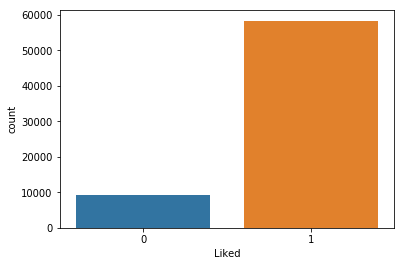

In [40]:
sns.countplot(x = data['Liked'],data = data)

In [64]:
from nltk.tokenize import word_tokenize

In [73]:

def find_length(txt):
    sent = txt.lower()
    wrds = word_tokenize(sent)
    clwrds = [w for w in wrds if not w in stopwords.words('english')]
    ln = len(clwrds)
    rt = [ln]
    return(rt)

In [66]:
#Create a field that shows the length of each review
tmp = list()
for i in range(len(data)):
    tmp.append(find_length(data.iloc[i,:]['pros']))
tmp = pd.DataFrame(tmp)
tmp.columns = ['pros_length']

In [67]:
tmp

,pros_length,clean_pros
0,3,people smart friendly
1,167,"1 ) food , food , food . 15+ cafes main campus..."
2,461,"* 're software engineer , 're among kings hill..."
3,188,ca n't find well-regarded company actually des...
4,903,"google world . every company , lots people ser..."
5,15,"people busy , nice help . make suitable intern..."
6,8,great working environment . good work life bal...
7,9,"work culture , benefits , growth , people ,"
8,47,great products . vision feel good . fair compe...
9,7,impact driven . best tech world .


In [70]:
tmp_con = list()
for i in range(len(data_pros_cons)):
    tmp_con.append(find_length(data_pros_cons.iloc[i,:]['cons']))
tmp_con = pd.DataFrame(tmp_con)
tmp_con.columns = ['cons_length']

In [72]:
tmp_con

,cons_length,
0,3,bureaucracy slowing things
1,281,1 ) work/life balance . balance ? perks benefi...
2,131,"* *is* becoming larger , comes growing pains :..."
3,314,live sf commute take 1.5 hours 1.75 hours way ...
4,521,"n't work mtv ( hq ) , given work . however pas..."
5,10,food good expected . people said getting worse...
6,7,usual big company problems . hierarchy .
7,2,cons think
8,44,younger employees complaining company catering...
9,8,size matters . engineers bit disconnected cust...


In [74]:
tmp["cons_length"] = tmp_con['cons_length']

,pros_length,clean_pros,cons_length
0,3,people smart friendly,3
1,167,"1 ) food , food , food . 15+ cafes main campus...",281
2,461,"* 're software engineer , 're among kings hill...",131
3,188,ca n't find well-regarded company actually des...,314
4,903,"google world . every company , lots people ser...",521
5,15,"people busy , nice help . make suitable intern...",10
6,8,great working environment . good work life bal...,7
7,9,"work culture , benefits , growth , people ,",2
8,47,great products . vision feel good . fair compe...,44
9,7,impact driven . best tech world .,8


In [77]:
print(tmp["pros_length"].mean())
print(tmp["cons_length"].mean())
print(tmp["pros_length"].max())
print(tmp["cons_length"].max())
print(tmp["pros_length"].min())
print(tmp["cons_length"].min())

16.0743384323772
20.4680655718284
903
1447
0
0


In [85]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

In [96]:
plt2 = go.Histogram(x = tmp['pros_length'])
lyt2 = go.Layout(title="Frequency of Pros Review Length", xaxis=dict(title='Review Length', range=[0,250]), yaxis=dict(title='Frequency'))
fig2 = go.Figure(data=[plt2], layout=lyt2)
iplot(fig2)
plotly.offline.plot(fig2, filename='pros-length-chart.html')

'pros-length-chart.html'

In [92]:
plt3 = go.Histogram(x = tmp['cons_length'])
lyt3 = go.Layout(title="Frequency of Cons Review Length", xaxis=dict(title='Review Length', range=[0,300]), yaxis=dict(title='Frequency'))
fig3 = go.Figure(data=[plt3], layout=lyt3)
iplot(fig3)
plotly.offline.plot(fig3, filename='cons-length-chart.html')

'cons-length-chart.html'

In [41]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
ss = SnowballStemmer('english')

In [42]:
corpus = []
for i in range(0,67529):
    pro = re.sub('[^a-zA_Z]',' ',data['pros'][i])
    pro = pro.lower()
    pro = pro.split()
    pro = [ss.stem(word) for word in pro if word not in set(stopwords.words('english'))]
    pro = ' '.join(pro)
    corpus.append(pro)

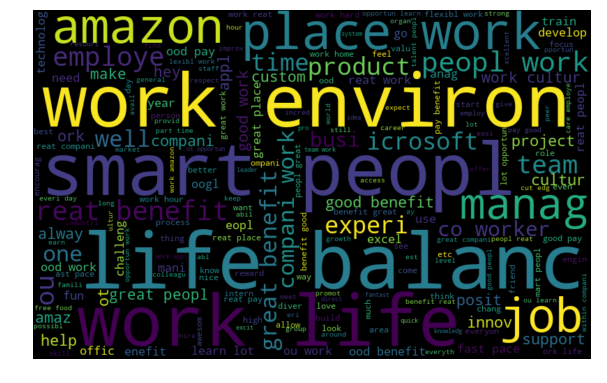

In [50]:
pro_words = ' '.join([text for text in corpus])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pro_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [56]:
corpus_cons = []
for i in range(0,67529):
    con = re.sub('[^a-zA_Z]',' ',data_pros_cons['cons'][i])
    con = con.lower()
    con = con.split()
    con = [ss.stem(word) for word in con if word not in set(stopwords.words('english'))]
    con = ' '.join(con)
    corpus_cons.append(con)

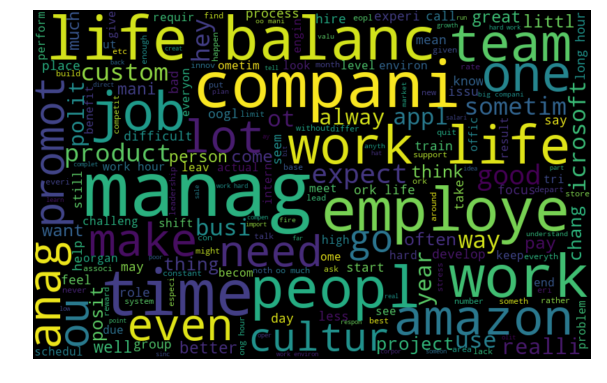

In [57]:
con_words = ' '.join([text for text in corpus_cons])
wordcloud_con = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(con_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_con, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
x = cv.fit_transform(corpus).toarray()
y = data['Liked']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [21]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred = mnb.predict(x_test)

In [23]:
#Training Set Predictions
y_train_pred = mnb.predict(x_train)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [25]:
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

             precision    recall  f1-score   support

          0       0.42      0.35      0.38      7349
          1       0.90      0.92      0.91     46674

avg / total       0.84      0.85      0.84     54023

[[ 2582  4767]
 [ 3529 43145]]


In [26]:
#Test Set Evaluation
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.39      0.32      0.35      1839
          1       0.90      0.92      0.91     11667

avg / total       0.83      0.84      0.83     13506



In [27]:
confusion_matrix(y_test,y_pred)

array([[  585,  1254],
       [  906, 10761]])

In [28]:
print('Training Accuracy ---->',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy  ---->',accuracy_score(y_test,y_pred))

Training Accuracy ----> 0.8464357773540899
Testing Accuracy  ----> 0.8400710795202132


In [97]:
from sklearn.linear_model import LogisticRegression


In [99]:
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)